<a href="https://colab.research.google.com/github/mirianbatista/abacates-fbprophet/blob/master/emd_prophet_abacates_mirian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install EMD-signal
import pandas as pd
from PyEMD import EMD
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

     |████████████████████████████████| 46 kB 2.5 MB/s 
     |████████████████████████████████| 81 kB 7.4 MB/s 
     |████████████████████████████████| 65 kB 1.2 MB/s 


In [ ]:
df = pd.read_csv('https://github.com/mirianbatista/abacates-fbprophet/blob/master/avocado.csv?raw=true').rename(columns={'Total Volume': 'total_volume'})
df.head()

,Unnamed: 0,Date,AveragePrice,total_volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df["ds"] = pd.to_datetime(df.Date)
df['y'] = df.total_volume
df = df.groupby('ds').agg({'y':'sum'})
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(df[['y']])
df['y_scaled'] = scaled_data 
df.drop(columns='y',inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,ds,y_scaled
0,2015-01-04,0.245620
1,2015-01-11,0.190999
2,2015-01-18,0.189508
3,2015-01-25,0.172345
4,2015-02-01,0.556098


In [ ]:
emd = EMD()
IMFs = emd(df['y_scaled'].values)

In [ ]:
len(IMFs)

6

In [ ]:
df['IMF_0'] = pd.DataFrame(IMFs[0])
df['IMF_1'] = pd.DataFrame(IMFs[1])
df['IMF_2'] = pd.DataFrame(IMFs[2])
df['IMF_3'] = pd.DataFrame(IMFs[3])
df['IMF_4'] = pd.DataFrame(IMFs[4])
df['IMF_5'] = pd.DataFrame(IMFs[5])

In [ ]:
df.set_index('ds',inplace=True)
df.head()

,y_scaled,IMF_0,IMF_1,IMF_2,IMF_3,IMF_4,IMF_5
ds,,,,,,,
2015-01-04,0.245620,-0.087764,-0.000783,0.060233,-0.028726,0.026519,0.276140
2015-01-11,0.190999,-0.162211,0.000798,0.078718,-0.030163,0.027796,0.276061
2015-01-18,0.189508,-0.173619,-0.002261,0.092260,-0.031722,0.028856,0.275993
2015-01-25,0.172345,-0.196018,0.000332,0.095927,-0.033520,0.029686,0.275939
2015-02-01,0.556098,0.187904,0.009874,0.087752,-0.035604,0.030275,0.275898


In [ ]:
df['y_scaled_reconstructed_signal'] = df['IMF_0'] + df['IMF_1'] + df['IMF_2'] + df['IMF_3'] + df['IMF_4'] + df['IMF_5']

In [ ]:
df

,y_scaled,IMF_0,IMF_1,IMF_2,IMF_3,IMF_4,IMF_5,y_scaled_reconstructed_signal
ds,,,,,,,,
2015-01-04,0.245620,-0.087764,-0.000783,0.060233,-0.028726,0.026519,0.276140,0.245620
2015-01-11,0.190999,-0.162211,0.000798,0.078718,-0.030163,0.027796,0.276061,0.190999
2015-01-18,0.189508,-0.173619,-0.002261,0.092260,-0.031722,0.028856,0.275993,0.189508
2015-01-25,0.172345,-0.196018,0.000332,0.095927,-0.033520,0.029686,0.275939,0.172345
2015-02-01,0.556098,0.187904,0.009874,0.087752,-0.035604,0.030275,0.275898,0.556098
...,...,...,...,...,...,...,...,...
2018-02-25,0.464846,-0.009363,-0.164248,-0.000555,0.234001,0.031644,0.373368,0.464846
2018-03-04,0.488178,0.075585,-0.216753,-0.019052,0.242225,0.032532,0.373640,0.488178
2018-03-11,0.484788,0.033000,-0.174059,-0.027387,0.246088,0.033250,0.373896,0.484788


In [ ]:
df.drop(columns='y_scaled_reconstructed_signal',inplace=True)

In [ ]:
df.head()

,y_scaled,IMF_0,IMF_1,IMF_2,IMF_3,IMF_4,IMF_5
ds,,,,,,,
2015-01-04,0.245620,-0.087764,-0.000783,0.060233,-0.028726,0.026519,0.276140
2015-01-11,0.190999,-0.162211,0.000798,0.078718,-0.030163,0.027796,0.276061
2015-01-18,0.189508,-0.173619,-0.002261,0.092260,-0.031722,0.028856,0.275993
2015-01-25,0.172345,-0.196018,0.000332,0.095927,-0.033520,0.029686,0.275939
2015-02-01,0.556098,0.187904,0.009874,0.087752,-0.035604,0.030275,0.275898


In [ ]:
prev.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,0.274969,0.276033,0.276169,0.274969,0.274969,0.001134,0.001134,0.001134,0.001134,0.001134,0.001134,0.0,0.0,0.0,0.276103
1,2015-01-11,0.275016,0.276017,0.276152,0.275016,0.275016,0.001071,0.001071,0.001071,0.001071,0.001071,0.001071,0.0,0.0,0.0,0.276086
2,2015-01-18,0.275062,0.275979,0.276113,0.275062,0.275062,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.0,0.0,0.0,0.276047
3,2015-01-25,0.275109,0.275919,0.276047,0.275109,0.275109,0.000872,0.000872,0.000872,0.000872,0.000872,0.000872,0.0,0.0,0.0,0.275980
4,2015-02-01,0.275155,0.275829,0.275956,0.275155,0.275155,0.000740,0.000740,0.000740,0.000740,0.000740,0.000740,0.0,0.0,0.0,0.275895


In [ ]:
lst_prev = []
cont = -1
df_prev = pd.DataFrame()
for item in df.columns:
    df_aux = pd.DataFrame(df[item])
    df_aux.columns = ['y']
    df_aux.reset_index(inplace=True)
    m = Prophet()
    m.fit(df_aux)
    future = m.make_future_dataframe(periods=365)
    prev = m.predict(future)
    lst_prev.append(pd.DataFrame(prev)['yhat'])
    if(cont == -1):
      df_prev['yhat'] = prev['yhat']
    else:
      df_prev[f'IMF{cont}_yhat'] = prev['yhat']
    cont += 1

df_prev['ds'] = prev['ds']
df_prev.set_index('ds', inplace=True)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [ ]:
df_prev.head()

,yhat,IMF0_yhat,IMF1_yhat,IMF2_yhat,IMF3_yhat,IMF4_yhat,IMF5_yhat
ds,,,,,,,
2015-01-04,0.212425,-0.055588,0.019171,-0.009039,-0.016666,0.007369,0.276103
2015-01-11,0.233069,-0.065792,-0.012161,0.034857,-0.001283,0.009295,0.276086
2015-01-18,0.281831,-0.057306,-0.023464,0.070652,0.012516,0.010221,0.276047
2015-01-25,0.366310,-0.046950,0.012101,0.094191,0.026657,0.010701,0.275980
2015-02-01,0.442913,-0.055203,0.074488,0.102529,0.040726,0.011277,0.275895


In [ ]:
df_prev['prev_reconstructed'] = df_prev['IMF0_yhat'] + df_prev['IMF1_yhat'] + df_prev['IMF2_yhat'] + df_prev['IMF3_yhat'] + df_prev['IMF4_yhat']  + df_prev['IMF5_yhat'] 

In [ ]:
df_prev

,yhat,IMF0_yhat,IMF1_yhat,IMF2_yhat,IMF3_yhat,IMF4_yhat,IMF5_yhat,prev_reconstructed
ds,,,,,,,,
2015-01-04,0.212425,-0.055588,0.019171,-0.009039,-0.016666,0.007369,0.276103,0.221350
2015-01-11,0.233069,-0.065792,-0.012161,0.034857,-0.001283,0.009295,0.276086,0.241001
2015-01-18,0.281831,-0.057306,-0.023464,0.070652,0.012516,0.010221,0.276047,0.288665
2015-01-25,0.366310,-0.046950,0.012101,0.094191,0.026657,0.010701,0.275980,0.372681
2015-02-01,0.442913,-0.055203,0.074488,0.102529,0.040726,0.011277,0.275895,0.449712
...,...,...,...,...,...,...,...,...
2019-03-21,0.487035,0.101473,-0.083877,-0.084487,0.147531,0.008192,0.398494,0.487325
2019-03-22,0.484811,0.098841,-0.079947,-0.086308,0.146051,0.007860,0.398535,0.485032
2019-03-23,0.481463,0.095762,-0.076691,-0.087935,0.144412,0.007491,0.398576,0.481615


In [ ]:
pd.plotting.register_matplotlib_converters()

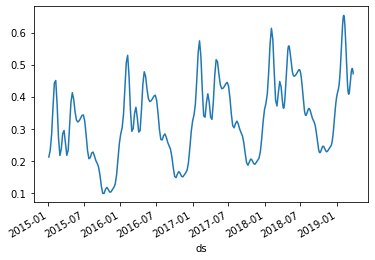

In [ ]:
df_prev['yhat'].plot()

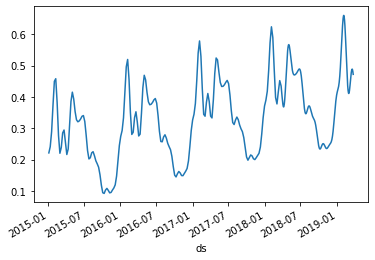

In [ ]:
df_prev['prev_reconstructed'].plot()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2017-03-30 00:00:00 and 2017-03-30 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 0, 'ds')

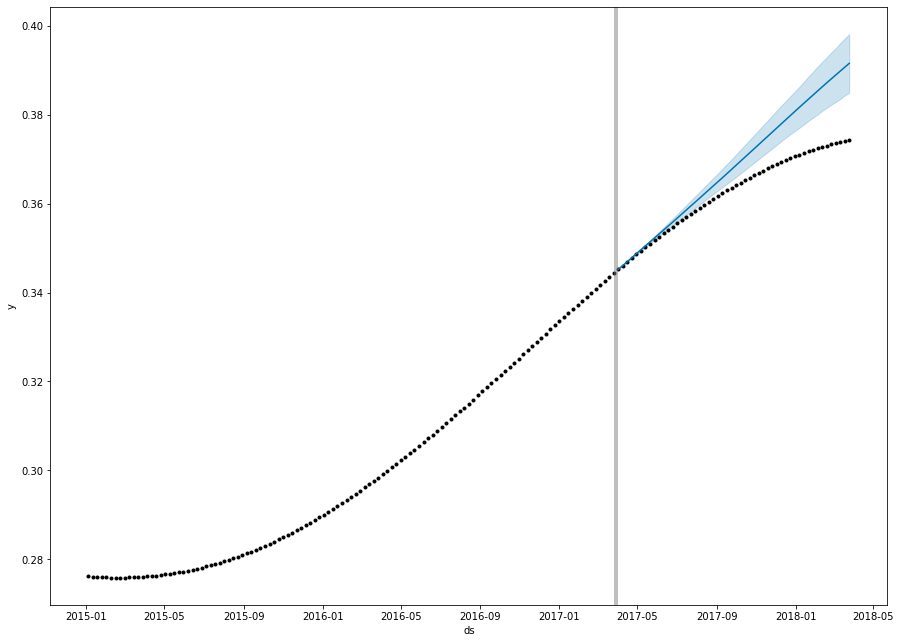

In [ ]:
df_cv = cross_validation(
    m, '360 days', initial='730 days', period='180 days')
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

fig = plt.figure(facecolor='w', figsize=(15, 11))
ax = fig.add_subplot(111)
ax.plot(m.history['ds'].values, m.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'], df_cv['yhat_upper'], color='#0072B2', alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [ ]:
def  cross_validation_func(m):
    cv_results = cross_validation(m,horizon=7)

    df_performance = performance_metrics(cv_results)

    df_performance['horizon'] = df_performance['horizon'].apply(lambda x: x.days)
    df_horizon = df_performance.groupby(['horizon'])['mape'].mean()

    return df_horizon

In [ ]:
result_cv = cross_validation_func(m)
result_cv

INFO:fbprophet:Making 116 forecasts with cutoffs between 2016-01-09 23:59:59.999999993 and 2018-03-24 23:59:59.999999993


  0%|          | 0/116 [00:00<?, ?it/s]

horizon
0    0.000115
Name: mape, dtype: float64